In [ ]:

import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

nltk.download('punkt')

def display(to_display):
    print()
    print(to_display)
    print()
    


## Implementation of Bag of words with python sklearn


In [14]:

sentences = [
    
    "This pasta is very tasty and affordable.", 
    "This pasta is not tasty and is affordable.", 
    "This pasta is very very delicious."
    
]

count_vectorizer = CountVectorizer()

X = count_vectorizer.fit_transform(sentences)

result = X.toarray()

display(f" > Result of Bag of words:\n\n { result }")



 > Result of Bag of words:

 [[1 1 0 1 0 1 1 1 1]
 [1 1 0 2 1 1 1 1 0]
 [0 0 1 1 0 1 0 1 2]]




## Implementation of TF-IDF by using sklearn


In [16]:

tfid_vectorizer = TfidfVectorizer()

vectors = tfid_vectorizer.fit_transform(sentences)

feature_names = tfid_vectorizer.get_feature_names_out()

display(f" > Feature names:\n\n { feature_names }")



 > Feature names:

 ['affordable' 'and' 'delicious' 'is' 'not' 'pasta' 'tasty' 'this' 'very']



In [18]:

matrix = vectors. todense()
dense_list = matrix.tolist()

df = pd.DataFrame(dense_list, columns = feature_names)

display(f" > Final Result of Tf-Idf:\n\n { df }")



 > Final Result of Tf-Idf:

    affordable       and  delicious        is       not     pasta     tasty  \
0    0.414896  0.414896   0.000000  0.322204  0.000000  0.322204  0.414896   
1    0.346117  0.346117   0.000000  0.537582  0.455102  0.268791  0.346117   
2    0.000000  0.000000   0.478909  0.282851  0.000000  0.282851  0.000000   

       this      very  
0  0.322204  0.414896  
1  0.268791  0.000000  
2  0.282851  0.728445  




## word2vec implementation


In [23]:

with open("example_text.txt", 'r', encoding = 'utf-8') as txt:
    sentences = txt.readlines()
    
display(f" > Number of sentences: { len(sentences) }")

display(f" > First sentence from text file:\n\n { sentences[0] }")



 > Number of sentences: 11


 > First sentence from text file:

 Les premiers travaux en traitement automatique du langage naturel commencent dans les années 1950, 




In [24]:

# remove punctuations

for index in range(len(sentences)):
    sentences[index] = re.sub("[^a-zA-Z]" ," ", str(sentences[index]))

display(f" > First sentence after removing punctuations:\n\n { sentences[0] }")



 > First sentence after removing punctuations:

 Les premiers travaux en traitement automatique du langage naturel commencent dans les ann es        



In [26]:

# tokenization

words_tokenized = []

for sentence in sentences:
    word_tokens = word_tokenize(sentence)
    words_tokenized.append(word_tokens)

display(f" > First sentence after tokenize:\n\n { words_tokenized[0] }")



 > First sentence after tokenize:

 ['Les', 'premiers', 'travaux', 'en', 'traitement', 'automatique', 'du', 'langage', 'naturel', 'commencent', 'dans', 'les', 'ann', 'es']




## Building word2vec with CBOW method


In [48]:

model_cbow = Word2Vec(
    
    sentences = words_tokenized,
    vector_size = 2,
    window = 2,
    min_count = 2,
    workers = 1,
    sg = 0 
    
)

words_cbow = list(model_cbow.wv.key_to_index)

display(words_tokenized)
display(f" > Total number of words: { len(words_cbow) }")

vectors_tree = model_cbow.wv.key_to_index

display(vectors_tree)



[['Les', 'premiers', 'travaux', 'en', 'traitement', 'automatique', 'du', 'langage', 'naturel', 'commencent', 'dans', 'les', 'ann', 'es'], ['principalement', 'aux', 'tats', 'Unis', 'o', 'le', 'contexte', 'politique', 'li', 'la', 'guerre', 'froide'], ['est', 'propice', 'au', 'd', 'veloppement', 'de', 'la', 'th', 'matique', 'de', 'la', 'traduction', 'automatique'], [], ['Les', 'premi', 'res', 'applications', 'informatiques', 'sont', 'li', 'es', 'au', 'traitement', 'automatique', 'des', 'conversations'], ['En', 'dans', 'son', 'article', 'fondateur', 'de', 'l', 'intelligence', 'artificielle', 'Computing', 'machinery', 'and', 'intelligence'], ['Alan', 'Turing', 'expose', 'une', 'm', 'thode', 'd', 'valuation', 'qui', 'sera', 'appel', 'e', 'par', 'la', 'suite', 'test', 'de', 'Turing', 'ou', 'crit', 're', 'de', 'Turing'], ['Ce', 'test', 'mesure', 'le', 'degr', 'd', 'intelligence', 'd', 'une', 'machine', 'partir', 'de', 'la', 'capacit', 'd', 'un', 'programme', 'conversationnel'], ['se', 'faire'

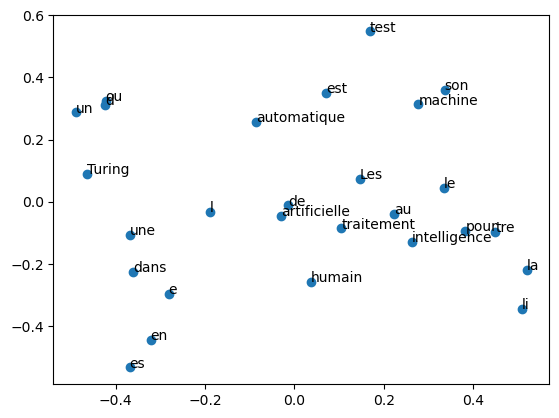

In [46]:

X = model_cbow.wv.vectors
pca_model = PCA(n_components = 2)
result = pca_model.fit_transform(X)

words_cbow = list(model_cbow.wv.key_to_index)

for i, word in enumerate(words_cbow[:100]):
    plt.annotate(text = word, xy = (result[i, 0], result[i, 1]))

plt.scatter(result[:, 0], result[:, 1])
plt.show()



## Building word2vec with skip-gram method


In [49]:

model_skip = Word2Vec(
    
    sentences = words_tokenized,
    vector_size = 2,
    window = 2,
    min_count = 4,
    workers = 1,
    sg = 1 
    
)

words_skip_gram = list(model_skip.wv.key_to_index)

display(words_tokenized)
display(f" > Total number of words: { len(words_skip_gram) }")

words_embeddings = model_skip.wv.key_to_index

display(words_embeddings)



[['Les', 'premiers', 'travaux', 'en', 'traitement', 'automatique', 'du', 'langage', 'naturel', 'commencent', 'dans', 'les', 'ann', 'es'], ['principalement', 'aux', 'tats', 'Unis', 'o', 'le', 'contexte', 'politique', 'li', 'la', 'guerre', 'froide'], ['est', 'propice', 'au', 'd', 'veloppement', 'de', 'la', 'th', 'matique', 'de', 'la', 'traduction', 'automatique'], [], ['Les', 'premi', 'res', 'applications', 'informatiques', 'sont', 'li', 'es', 'au', 'traitement', 'automatique', 'des', 'conversations'], ['En', 'dans', 'son', 'article', 'fondateur', 'de', 'l', 'intelligence', 'artificielle', 'Computing', 'machinery', 'and', 'intelligence'], ['Alan', 'Turing', 'expose', 'une', 'm', 'thode', 'd', 'valuation', 'qui', 'sera', 'appel', 'e', 'par', 'la', 'suite', 'test', 'de', 'Turing', 'ou', 'crit', 're', 'de', 'Turing'], ['Ce', 'test', 'mesure', 'le', 'degr', 'd', 'intelligence', 'd', 'une', 'machine', 'partir', 'de', 'la', 'capacit', 'd', 'un', 'programme', 'conversationnel'], ['se', 'faire'

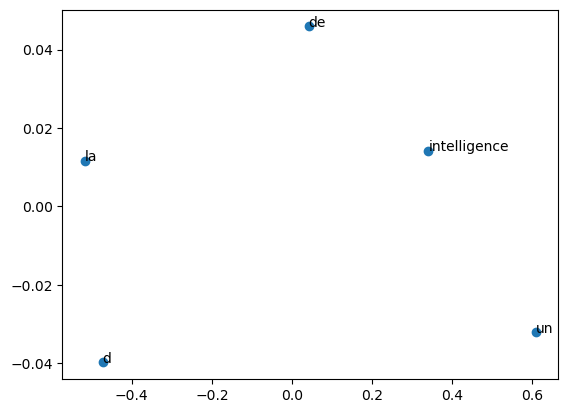

In [50]:

X = model_skip.wv.vectors
pca_model = PCA(n_components = 2)
result = pca_model.fit_transform(X)

words_skip_gram = list(model_skip.wv.key_to_index)

for i, word in enumerate(words_skip_gram[:100]):
    plt.annotate(text = word, xy = (result[i, 0], result[i, 1]))

plt.scatter(result[:, 0], result[:, 1])
plt.show()
